# Nxumalo Mzwandile 
### The Objective: Automating Cancer Prediction with High Accuracy

In [1]:
import numpy as np
import tensorflow as tf
import os #interacting with the operating system
import cv2 #open computer vision
import matplotlib.pyplot as plt

#for Model building 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
from tensorflow.keras.models import load_model
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import tqdm
from PIL import Image
import io
import ipywidgets as widgets

### Folder Paths 

In [2]:
X_train = []
Y_train = []
image_size = 150
labels = ['Normal','Type 1','Type 2','Type 3']
for i in labels:
    folderPath = os.path.join('train/',i) #the folder path for the train dataset
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j)) # read the folder and the image content found in the folder
        img = cv2.resize(img,(image_size,image_size)) #image resize 
        X_train.append(img)
        Y_train.append(i)

for i in labels:
    folderPath = os.path.join('test/',i) #test data folder path
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [3]:
X_train,Y_train = shuffle(X_train,Y_train,random_state=101)
X_train.shape #this will give us the contents of the dataset


(928, 150, 150, 3)

### Train Test split

In [4]:
X_train,X_test,y_train,y_test = train_test_split(X_train,Y_train,test_size=0.2,random_state=101)

In [5]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test=y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

### Model Building 

In [6]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))

model.add(Dropout(0.3))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(512,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(4,activation='softmax')) #we are using softmax as the activation param because we are dealing with probability problem 
#as to whether the image belongs to one of the labels or not

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 73, 73, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 73, 73, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 69, 69, 64)        36928     
                                                        

In [8]:
model.compile('Adam', loss=tf.losses.CategoricalCrossentropy(), metrics=['accuracy'])

### Model Training

In [9]:
history = model.fit(X_train,y_train,epochs=30,validation_split=0.1)

Epoch 1/30


21/21 [==============================] - 63s 3s/step - loss: 4.7758 - accuracy: 0.2714 - val_loss: 1.3773 - val_accuracy: 0.2133
Epoch 2/30
21/21 [==============================] - 60s 3s/step - loss: 1.3375 - accuracy: 0.3613 - val_loss: 1.3531 - val_accuracy: 0.3600
Epoch 3/30
21/21 [==============================] - 61s 3s/step - loss: 1.3210 - accuracy: 0.3958 - val_loss: 1.3964 - val_accuracy: 0.2133
Epoch 4/30
21/21 [==============================] - 59s 3s/step - loss: 1.2721 - accuracy: 0.4138 - val_loss: 1.4289 - val_accuracy: 0.2133
Epoch 5/30
21/21 [==============================] - 60s 3s/step - loss: 1.1765 - accuracy: 0.4738 - val_loss: 1.6009 - val_accuracy: 0.2133
Epoch 6/30
21/21 [==============================] - 60s 3s/step - loss: 1.1265 - accuracy: 0.4903 - val_loss: 1.5546 - val_accuracy: 0.2133
Epoch 7/30
21/21 [==============================] - 60s 3s/step - loss: 0.9795 - accuracy: 0.5622 - val_loss: 2.1012 - val_accuracy: 0.2133
Epoch 8/30
21/21 [

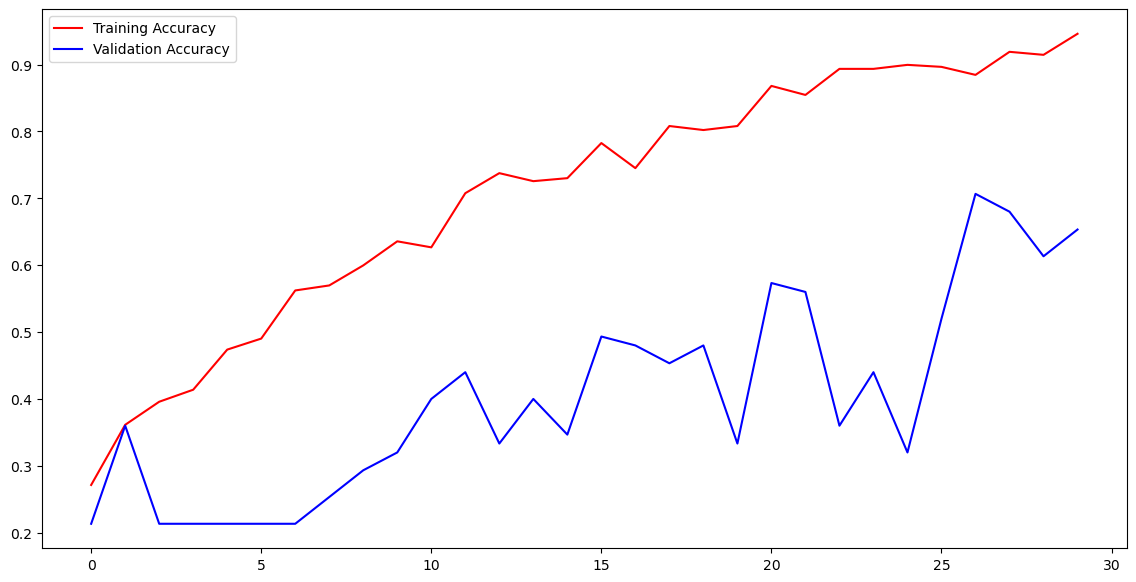

In [10]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

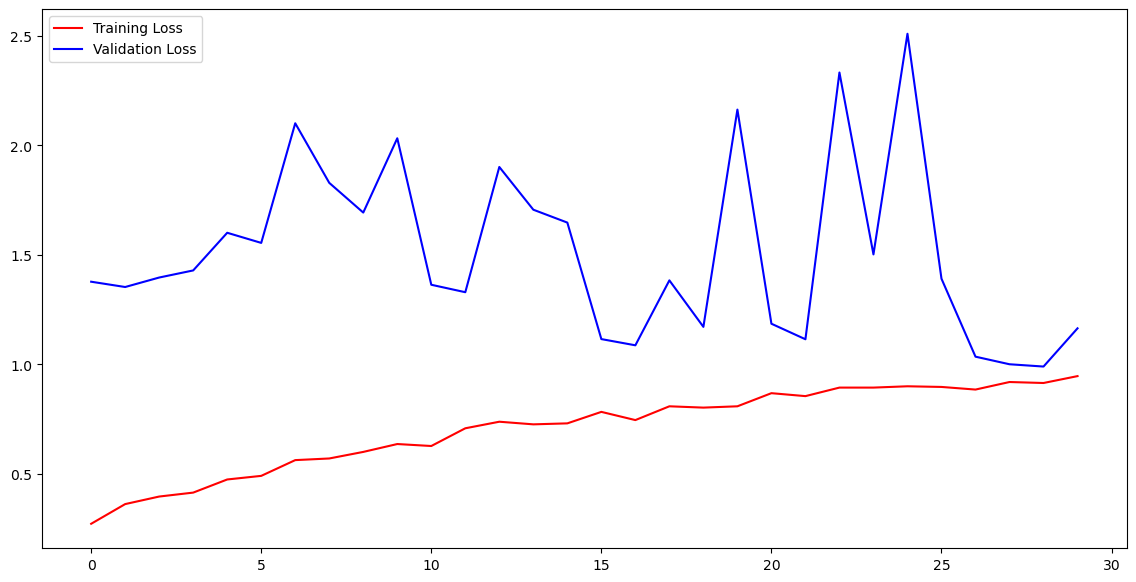

In [11]:
loss = history.history['loss']
val_acc = history.history['val_loss']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Loss")
plt.plot(epochs,val_acc,'b',label="Validation Loss")
plt.legend(loc='upper left')
plt.show()

### Prediction

In [12]:
img = cv2.imread('train/Type 1/000017 (8).png')
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array.shape

(150, 150, 3)

In [13]:
img_array = img_array.reshape(1,150,150,3)
img_array.shape

(1, 150, 150, 3)

In [14]:
a=model.predict(img_array)
indices = a.argmax()
indices

1/1 [==============================] - 0s 257ms/step


1

###### The model gave a 94% accuracy but then my validation loss and the training loss was not decreasing drastically maybe the epochs were to be increased to avoid the overfitting problem.

## Fine Tuning the model for better results and accuracy

In [18]:
#lets start with the regularization (kernel), addition of the kernel parameter, validation data= xtest and ytest and the epochs decreased to 20
from tensorflow.keras.regularizers import L2
model_1 = Sequential()

model_1.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(150,150,3)))
model_1.add(Conv2D(64,(3,3),activation='relu' , kernel_regularizer=L2(0.001)))
model_1.add(MaxPooling2D(2,2))


model_1.add(Conv2D(64,(3,3),activation='relu' , kernel_regularizer=L2(0.001)))
model_1.add(Conv2D(64,(3,3),activation='relu', kernel_regularizer=L2(0.001)))
model_1.add(Dropout(0.3))
model_1.add(MaxPooling2D(2,2))

model_1.add(Dropout(0.3))

model_1.add(Conv2D(128,(3,3),activation='relu', kernel_regularizer=L2(0.001)))
model_1.add(Conv2D(128,(3,3),activation='relu', kernel_regularizer=L2(0.001)))
model_1.add(Conv2D(128,(3,3),activation='relu' ,kernel_regularizer=L2(0.001)))
model_1.add(MaxPooling2D(2,2))
model_1.add(Dropout(0.3))

model_1.add(Conv2D(128,(3,3),activation='relu', kernel_regularizer=L2(0.001)))
model_1.add(Conv2D(256,(3,3),activation='relu', kernel_regularizer=L2(0.001)))
model_1.add(MaxPooling2D(2,2))
model_1.add(Dropout(0.3))

model_1.add(Flatten())

model_1.add(Dense(512,activation = 'relu', kernel_regularizer=L2(0.001)))
model_1.add(Dense(512,activation = 'relu', kernel_regularizer=L2(0.001)))
model_1.add(Dropout(0.3))
model_1.add(Dense(4,activation='softmax'))

model_1.compile('Adam', loss=tf.losses.CategoricalCrossentropy(), metrics=['accuracy'])
history = model_1.fit(X_train,y_train,epochs=20,validation_data=(X_test,y_test))

Epoch 1/20
24/24 [==============================] - 68s 3s/step - loss: 4.4594 - accuracy: 0.2803 - val_loss: 3.4864 - val_accuracy: 0.3226
Epoch 2/20
24/24 [==============================] - 65s 3s/step - loss: 3.3705 - accuracy: 0.3989 - val_loss: 3.2858 - val_accuracy: 0.3387
Epoch 3/20
24/24 [==============================] - 66s 3s/step - loss: 3.1728 - accuracy: 0.4340 - val_loss: 3.0835 - val_accuracy: 0.4247
Epoch 4/20
24/24 [==============================] - 67s 3s/step - loss: 2.8888 - accuracy: 0.4960 - val_loss: 3.0925 - val_accuracy: 0.4247
Epoch 5/20
24/24 [==============================] - 67s 3s/step - loss: 2.8506 - accuracy: 0.4367 - val_loss: 3.2679 - val_accuracy: 0.4086
Epoch 6/20
24/24 [==============================] - 66s 3s/step - loss: 2.6518 - accuracy: 0.5040 - val_loss: 2.8599 - val_accuracy: 0.3602
Epoch 7/20
24/24 [==============================] - 66s 3s/step - loss: 2.6906 - accuracy: 0.4259 - val_loss: 2.6977 - val_accuracy: 0.4624
Epoch 8/20
24/24 [==

In [21]:
#lets alter with the learning rate and the number of epochs because the training was very slow
#lets start with the regularization (kernel), addition of the kernel parameter, validation data= xtest and ytest and the epochs decreased to 20
from tensorflow.keras.regularizers import L2
from tensorflow.keras.optimizers import Adam
opt = Adam(learning_rate=0.001)
model_2 = Sequential()

model_2.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(150,150,3)))
model_2.add(Conv2D(64,(3,3),activation='relu' , kernel_regularizer=L2(0.001)))
model_2.add(MaxPooling2D(2,2))


model_2.add(Conv2D(64,(3,3),activation='relu' , kernel_regularizer=L2(0.001)))
model_2.add(Conv2D(64,(3,3),activation='relu', kernel_regularizer=L2(0.001)))
model_2.add(Dropout(0.3))
model_2.add(MaxPooling2D(2,2))

model_2.add(Dropout(0.3))

model_2.add(Conv2D(128,(3,3),activation='relu', kernel_regularizer=L2(0.001)))
model_2.add(Conv2D(128,(3,3),activation='relu', kernel_regularizer=L2(0.001)))
model_2.add(Conv2D(128,(3,3),activation='relu' ,kernel_regularizer=L2(0.001)))
model_2.add(MaxPooling2D(2,2))
model_2.add(Dropout(0.3))

model_2.add(Conv2D(128,(3,3),activation='relu', kernel_regularizer=L2(0.001)))
model_2.add(Conv2D(256,(3,3),activation='relu', kernel_regularizer=L2(0.001)))
model_2.add(MaxPooling2D(2,2))
model_2.add(Dropout(0.3))

model_2.add(Flatten())

model_2.add(Dense(512,activation = 'relu', kernel_regularizer=L2(0.001)))
model_2.add(Dense(512,activation = 'relu', kernel_regularizer=L2(0.001)))
model_2.add(Dropout(0.3))
model_2.add(Dense(4,activation='softmax'))

model_2.compile('Adam', loss=tf.losses.CategoricalCrossentropy(), metrics=['accuracy'])
history_2 = model_2.fit(X_train,y_train,epochs=30,validation_data=(X_test,y_test))

Epoch 1/30
24/24 [==============================] - 69s 3s/step - loss: 4.5526 - accuracy: 0.2844 - val_loss: 3.4578 - val_accuracy: 0.5161
Epoch 2/30
24/24 [==============================] - 66s 3s/step - loss: 3.3566 - accuracy: 0.3437 - val_loss: 3.3265 - val_accuracy: 0.3226
Epoch 3/30
24/24 [==============================] - 66s 3s/step - loss: 3.1332 - accuracy: 0.4407 - val_loss: 3.1316 - val_accuracy: 0.3925
Epoch 4/30
24/24 [==============================] - 66s 3s/step - loss: 2.9382 - accuracy: 0.4596 - val_loss: 3.1709 - val_accuracy: 0.3602
Epoch 5/30
24/24 [==============================] - 66s 3s/step - loss: 2.7152 - accuracy: 0.5000 - val_loss: 2.9003 - val_accuracy: 0.3495
Epoch 6/30
24/24 [==============================] - 67s 3s/step - loss: 2.6636 - accuracy: 0.5148 - val_loss: 3.0162 - val_accuracy: 0.3763
Epoch 7/30
24/24 [==============================] - 88s 4s/step - loss: 2.4924 - accuracy: 0.5283 - val_loss: 2.6562 - val_accuracy: 0.4677
Epoch 8/30
24/24 [==

In [25]:
#changing the validation split and the epochs
model_3 = Sequential()
opt = Adam(learning_rate=0.00001)
model_3.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(150,150,3)))
model_3.add(Conv2D(64,(3,3),activation='relu'))
model_3.add(MaxPooling2D(2,2))
model_3.add(Dropout(0.3))

model_3.add(Conv2D(64,(3,3),activation='relu'))
model_3.add(Conv2D(64,(3,3),activation='relu'))
model_3.add(Dropout(0.3))
model_3.add(MaxPooling2D(2,2))

model_3.add(Dropout(0.3))

model_3.add(Conv2D(128,(3,3),activation='relu'))
model_3.add(Conv2D(128,(3,3),activation='relu'))
model_3.add(Conv2D(128,(3,3),activation='relu'))
model_3.add(MaxPooling2D(2,2))
model_3.add(Dropout(0.3))

model_3.add(Conv2D(128,(3,3),activation='relu'))
model_3.add(Conv2D(256,(3,3),activation='relu'))
model_3.add(MaxPooling2D(2,2))
model_3.add(Dropout(0.3))

model_3.add(Flatten())

model_3.add(Dense(512,activation = 'relu'))
model_3.add(Dense(512,activation = 'relu'))
model_3.add(Dropout(0.3))
model_3.add(Dense(4,activation='softmax'))

model_3.compile('Adam', loss=tf.losses.CategoricalCrossentropy(), metrics=['accuracy'])
history_3 = model_3.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test))

Epoch 1/10
24/24 [==============================] - 76s 3s/step - loss: 3.1214 - accuracy: 0.3154 - val_loss: 1.3658 - val_accuracy: 0.3226
Epoch 2/10
24/24 [==============================] - 72s 3s/step - loss: 1.3163 - accuracy: 0.3881 - val_loss: 1.3633 - val_accuracy: 0.3226
Epoch 3/10
24/24 [==============================] - 74s 3s/step - loss: 1.2157 - accuracy: 0.4596 - val_loss: 1.2849 - val_accuracy: 0.3871
Epoch 4/10
24/24 [==============================] - 68s 3s/step - loss: 1.1868 - accuracy: 0.4434 - val_loss: 1.2710 - val_accuracy: 0.3925
Epoch 5/10
24/24 [==============================] - 68s 3s/step - loss: 1.1627 - accuracy: 0.4515 - val_loss: 1.1881 - val_accuracy: 0.4247
Epoch 6/10
24/24 [==============================] - 69s 3s/step - loss: 1.1001 - accuracy: 0.4245 - val_loss: 1.2362 - val_accuracy: 0.4140
Epoch 7/10
24/24 [==============================] - 71s 3s/step - loss: 1.0001 - accuracy: 0.5175 - val_loss: 1.1650 - val_accuracy: 0.5269
Epoch 8/10
24/24 [==

In [26]:
model4 = Sequential()
model4.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(150,150,3)))
model4.add(Conv2D(64,(3,3),activation='relu'))
model4.add(MaxPooling2D(2,2))
model4.add(Dropout(0.3))

model4.add(Conv2D(64,(3,3),activation='relu'))
model4.add(Conv2D(64,(3,3),activation='relu'))
model4.add(Dropout(0.3))
model4.add(MaxPooling2D(2,2))

model4.add(Dropout(0.3))

model4.add(Conv2D(128,(3,3),activation='relu'))
model4.add(Conv2D(128,(3,3),activation='relu'))
model4.add(Conv2D(128,(3,3),activation='relu'))
model4.add(MaxPooling2D(2,2))
model4.add(Dropout(0.3))

model4.add(Conv2D(128,(3,3),activation='relu'))
model4.add(Conv2D(256,(3,3),activation='relu'))
model4.add(MaxPooling2D(2,2))
model4.add(Dropout(0.3))

model4.add(Flatten())

model4.add(Dense(512,activation = 'relu'))
model4.add(Dense(512,activation = 'relu'))
model4.add(Dropout(0.3))
model4.add(Dense(4,activation='softmax')) #we are using softmax as the activation param because we are dealing with probability problem 
#as to whether the image belongs to one of the labels or not

model4.compile('Adam', loss=tf.losses.CategoricalCrossentropy(), metrics=['accuracy'])
history4 = model4.fit(X_train,y_train,epochs=20,validation_split=0.1)

Epoch 1/20
21/21 [==============================] - 63s 3s/step - loss: 4.3736 - accuracy: 0.2999 - val_loss: 1.3711 - val_accuracy: 0.2133
Epoch 2/20
21/21 [==============================] - 60s 3s/step - loss: 1.3272 - accuracy: 0.3658 - val_loss: 1.3707 - val_accuracy: 0.3600
Epoch 3/20
21/21 [==============================] - 60s 3s/step - loss: 1.2761 - accuracy: 0.4393 - val_loss: 1.3613 - val_accuracy: 0.3733
Epoch 4/20
21/21 [==============================] - 61s 3s/step - loss: 1.1423 - accuracy: 0.4708 - val_loss: 1.2774 - val_accuracy: 0.4933
Epoch 5/20
21/21 [==============================] - 61s 3s/step - loss: 1.1315 - accuracy: 0.4633 - val_loss: 1.3291 - val_accuracy: 0.3733
Epoch 6/20
21/21 [==============================] - 61s 3s/step - loss: 0.9799 - accuracy: 0.5217 - val_loss: 1.0589 - val_accuracy: 0.5600
Epoch 7/20
21/21 [==============================] - 61s 3s/step - loss: 0.9631 - accuracy: 0.5622 - val_loss: 0.8964 - val_accuracy: 0.6400
Epoch 8/20
21/21 [==

### as it turns out i'm struggling to increase my accuracy from the original model that had the 95% accuracy on the training data 